In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
R1_0_10_Pt = np.array([34.21, 2461.08, 754.08, 2350.62, 4113.53, 1179.57])
R2_0_10_Pt = np.array([54.99, 2638.34, 729.61, 1827.19, 4288.24, 1420.54])

R1_10_20_Pt = np.array([53.70, 3064.80, 793.40, 1704.78, 3859.41, 1541.90])
R2_10_20_Pt = np.array([59.47, 2682.02, 811.75, 1783.70, 3232.06, 1670.36])

labels_amostras = ["R1 0–10", "R2 0–10", "R1 10–20", "R2 10–20"]

R1_0_10_Pi = np.array([0, 0, 101.16, 64.22, 0, 0])
R2_0_10_Pi = np.array([0, 0, 195.33, 138.71, 0, 0 ])

R1_10_20_Pi = np.array([0, 0, 183.32, 111.60, 0, 0])
R2_10_20_Pi = np.array([0, 0, 171.11, 82.21, 0, 0])

R1_0_10_Po = np.array([R1_0_10_Pt[0], R1_0_10_Pt[1], R1_0_10_Pt[2] - 101.16, R1_0_10_Pt[3] - 64.22, R1_0_10_Pt[4], R1_0_10_Pt[5]])
R2_0_10_Po = np.array([R2_0_10_Pt[0], R2_0_10_Pt[1], R2_0_10_Pt[2] - 195.33, R2_0_10_Pt[3] - 138.71, R2_0_10_Pt[4], R2_0_10_Pt[5]])

R1_10_20_Po = np.array([R1_10_20_Pt[0], R1_10_20_Pt[1], R1_10_20_Pt[2] - 183.32, R1_10_20_Pt[3] - 111.60, R1_10_20_Pt[4], R1_10_20_Pt[5]])
R2_10_20_Po = np.array([R2_10_20_Pt[0], R2_10_20_Pt[1], R2_10_20_Pt[2] - 171.11, R2_10_20_Pt[3] - 82.21, R2_10_20_Pt[4], R2_10_20_Pt[5]])

dados_0_20 = np.vstack([R1_0_10_Pt,R2_0_10_Pt, R1_10_20_Pt,R2_10_20_Pt])
dados_0_10 = np.vstack([R1_0_10_Pt,R2_0_10_Pt])
dados_10_20 = np.vstack([R1_10_20_Pt,R2_10_20_Pt])

Po = np.vstack([R1_0_10_Po, R2_0_10_Po, R1_10_20_Po, R2_10_20_Po])
Pi = np.vstack([R1_0_10_Pi, R2_0_10_Pi, R1_10_20_Pi, R2_10_20_Pi])

In [3]:
# tyudo junto
media_0_20 = np.mean(dados_0_20, axis=0)
std_0_20 = np.std(dados_0_20, axis=0, ddof=1)

#0-10
media_0_10 = np.mean(dados_0_10, axis = 0)
std_0_10 = np.std(dados_0_10, axis=0, ddof =1)

#10-20
media_10_20 = np.mean(dados_10_20, axis = 0)
std_10_20 = np.std(dados_10_20, axis = 0, ddof = 1)

#Po ou Pi
media_Po = np.mean(Po, axis = 0)
std_Po = np.std(Po, axis = 0, ddof=1)
media_Pi = np.mean(Pi, axis = 0)
std_Pi = np.std(Pi, axis = 0, ddof = 1)

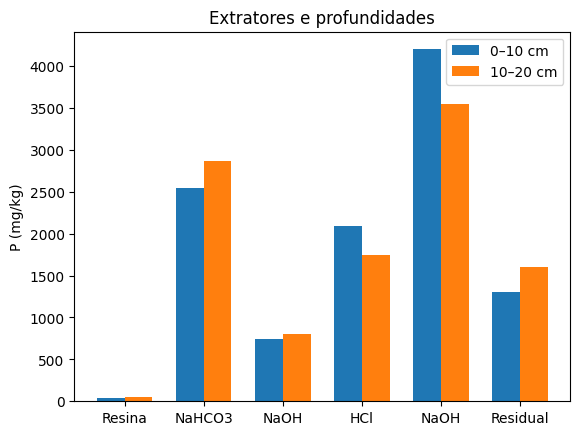

In [4]:
labels = ['Resina', 'NaHCO3', 'NaOH', 'HCl', 'NaOH', 'Residual']

means_0_10 = (R1_0_10_Pt + R2_0_10_Pt) / 2
means_10_20 = (R1_10_20_Pt + R2_10_20_Pt) / 2

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, means_0_10, width, label='0–10 cm')
ax.bar(x + width/2, means_10_20, width, label='10–20 cm')

ax.set_ylabel('P (mg/kg)')
ax.set_title('Extratores e profundidades')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [5]:
nomes_termos = ["Resina", "NaHCO3", "NaOH 0,1 M", "HCl 1 M", "NaOH 0,5 M", "Residual"]
cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Normalizado (%)", "Absoluto"),
                    shared_yaxes=False)
                    
def add_stacked_bars_with_errors(fig, medias, stds, col, cores, nomes):
    bases = np.cumsum(np.insert(medias, 0, 0))[:-1]  # posição de base de cada segm\ento
    for i in range(len(medias)):
        # Barra empilhada
        fig.add_trace(go.Bar(
            x=["0–20 cm"],
            y=[medias[i]],
            base=[bases[i]],  # define o início da barra (para empilhar manualmente)
            name=nomes[i],
            marker_color=cores[i],
            offsetgroup=str(i),
            showlegend=(col == 1),
        ), row=1, col=col)

        # Barra de erro 
        fig.add_trace(go.Scatter(
            x=["0–20 cm"],
            y=[bases[i] + medias[i]],
            mode='lines',
            line=dict(color='black', width=1.5),  # linha mais fina
            error_y=dict(
                type='data',
                array=[stds[i]],
                visible=True,
                thickness=1.5,
                width=4,
                color='black'
            ),
            showlegend=False,
            hoverinfo='skip'
        ), row=1, col=col)

# --- Gráficos ---
add_stacked_bars_with_errors(fig, media_0_20_norm, std_0_20_norm, 1, cores, nomes_termos)
add_stacked_bars_with_errors(fig, media_0_20, std_0_20, 2, cores, nomes_termos)

# --- Layout ---
fig.update_layout(
    barmode='stack',
    title_text="Distribuição dos termos de P (0–20 cm)",
    yaxis_title="Percentual (%)",
    yaxis2_title="Concentração em mg/kg",
    legend_title="Termos",
    legend=dict(x=1.05, y=1),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white"
)

fig.show()

NameError: name 'media_0_20_norm' is not defined

In [ ]:
dados = np.column_stack([R1_0_10_Pt, R2_0_10_Pt, R1_10_20_Pt, R2_10_20_Pt])

nomes_termos = ["Resina", "NaHCO3", "NaOH 0,1 M", "HCl 1 M", "NaOH 0,5 M", "Residual"]
cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

fig = go.Figure()

for i, termo in enumerate(nomes_termos):
    fig.add_trace(go.Bar(
        x=labels_amostras,
        y=dados[i],
        name=termo,
        marker_color=cores[i],
        hovertemplate=(
            f"{termo}<br>"
            "Amostra: %{x}<br>"
            "Valor: %{y:.2f}<extra></extra>"
        )
    ))

fig.update_layout(
    barmode='stack',
    title="Distribuição dos termos de P por amostra",
    yaxis_title="Concentração em mg/kg",
    legend_title="Termos",
    width=900,
    height=600,
    template="plotly_white"
)

fig.show()


In [ ]:
def normalizar(media, std):

    total = np.sum(media)
    media_norm = media / total * 100
    std_norm = std / total * 100

    return media_norm, std_norm

media_0_10_norm, std_0_10_norm = normalizar(media_0_10, std_0_10)
media_10_20_norm, std_10_20_norm = normalizar(media_10_20, std_10_20)

# --- Nomes e cores ---
nomes_termos = ["Resina", "NaHCO3", "NaOH 0,1 M", "HCl 1 M", "NaOH 0,5 M", "Residual"]
cores = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#ffa600']

# --- Subplots ---
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Normalizado (%)", "Absoluto"),
                    shared_yaxes=False)

# ==========================
# FUNÇÃO AUXILIAR
# ==========================
def add_stacked_bars_with_errors(fig, profundidades, medias, stds, col, cores, nomes):
    """
    profundidades: lista de labels, ex. ["0–10 cm", "10–20 cm"]
    medias/stds: listas de arrays (um para cada profundidade)
    """
    for j, label in enumerate(profundidades):
        bases = np.cumsum(np.insert(medias[j], 0, 0))[:-1]
        for i in range(len(medias[j])):
            # Barra empilhada
            fig.add_trace(go.Bar(
                x=[label],
                y=[medias[j][i]],
                base=[bases[i]],
                name=nomes[i],
                marker_color=cores[i],
                offsetgroup=str(j),
                showlegend=(col == 1 and j == 0),
            ), row=1, col=col)

            # Linha + barra de erro
            fig.add_trace(go.Scatter(
                x=[label],
                y=[bases[i] + medias[j][i]],
                mode='lines',
                line=dict(color='black', width=1.5),
                error_y=dict(
                    type='data',
                    array=[stds[j][i]],
                    visible=True,
                    thickness=1.5,
                    width=4,
                    color='black'
                ),
                showlegend=False,
                hoverinfo='skip'
            ), row=1, col=col)

# --- Adiciona as barras ---
add_stacked_bars_with_errors(
    fig,
    ["0–10 cm", "10–20 cm"],
    [media_0_10_norm, media_10_20_norm],
    [std_0_10_norm, std_10_20_norm],
    col=1,
    cores=cores,
    nomes=nomes_termos
)

add_stacked_bars_with_errors(
    fig,
    ["0–10 cm", "10–20 cm"],
    [media_0_10, media_10_20],
    [std_0_10, std_10_20],
    col=2,
    cores=cores,
    nomes=nomes_termos
)

fig.update_layout(
    barmode='stack',
    title_text="Distribuição dos termos de P por profundidade",
    yaxis_title="Percentual (%)",
    yaxis2_title="Concentração em mg/kg",
    legend_title="Termos",
    legend=dict(x=1.05, y=1),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white"
)

fig.show()


In [ ]:
nomes = ["Resina", "NaHCO₃", "NaOH 0.1 M", "HCl 1 M", "NaOH 0.5 M", "Residual"]
cores = ['#1EC729', '#349B3A', '#00F010', '#3B753F', '#2E4630', '#2F382F']
cores_Pi = ['#7b3ba4', '#6b75b2', '#4cc0ad', '#8eea95', '#fff176', '#ffb84d']
cores_Po = cores

def add_wide_bars_with_errors(fig, medias_Po, stds_Po, medias_Pi, stds_Pi, row, x_title):
    bar_height = 1 
    y_positions = np.arange(len(nomes))

    for i in range(len(nomes)):
        if i in [0, 5]:
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[medias_Po[i]],
                error_x=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.0, width=5),
                name=f"{nomes[i]} (Po)",
                orientation='h',
                marker_color=cores_Po[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=(row == 1)
            ), row=row, col=1)

            # Pi fictício = 0
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[0],
                orientation='h',
                marker_color=cores_Pi[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=False
            ), row=row, col=1)
        else:
            # Po
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[medias_Po[i]],
                error_x=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.0, width=5),
                name=f"{nomes[i]} (Po)",
                orientation='h',
                marker_color=cores_Po[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=False
            ), row=row, col=1)

            # Pi
            fig.add_trace(go.Bar(
                y=[nomes[i]],
                x=[medias_Pi[i]],
                error_x=dict(type='data', array=[stds_Pi[i]], color='black', thickness=1.0, width=5),
                name=f"{nomes[i]} (Pi)",
                orientation='h',
                marker_color=cores_Pi[i],
                width=bar_height,
                offsetgroup=str(i),
                showlegend=(row == 1)
            ), row=row, col=1)

    # só estética
    fig.update_xaxes(title_text=x_title, showgrid=True, gridcolor="lightgray", zeroline=True, row=row, col=1)
    fig.update_yaxes(showgrid=False, autorange="reversed", tickfont=dict(size=13), row=row, col=1)

fig = make_subplots(rows=2, cols=1, subplot_titles=("Normalizado (%)", "Absoluto"), shared_xaxes=False)

media_Po_gkg = media_Po / 1000
media_Pi_gkg = media_Pi / 1000
std_Po_gkg   = std_Po / 1000
std_Pi_gkg   = std_Pi / 1000

media_Po_norm, std_Po_norm = normalizar(media_Po, std_Po)
media_Pi_norm, std_Pi_norm = normalizar(media_Pi, std_Pi)

add_wide_bars_with_errors(fig, media_Po_norm, std_Po_norm, media_Pi_norm, std_Pi_norm, 1, "Percentual (%)")
add_wide_bars_with_errors(fig, media_Po_gkg, std_Po_gkg, media_Pi_gkg, std_Pi_gkg , 2, "Concentração (g/kg)")

fig.update_layout(
    barmode='group',
    title=dict(text="Distribuição de P (Pi e Po) - 0–20 cm", x=0.5, font=dict(size=22, family="Arial")),
    bargap=0.25,
    width=950,
    height=800,
    template="plotly_white",
    legend_title="Frações de P",
    legend=dict(
        orientation="h",
        y=-0.18,
        x=0,
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="lightgray",
        borderwidth=0.5
    ),
    margin=dict(l=110, r=40, t=90, b=100)
)

fig.show()

In [ ]:
def add_vertical_bars_with_errors(fig, medias_Po, stds_Po, medias_Pi, stds_Pi, col, y_title):
    bar_width = 0.5  # espessura da barra

    for i in range(len(nomes)):
        # Resina e Residual
        if i in [0, 5]:
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[medias_Po[i]],
                error_y=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.4, width=5),
                name=f"{nomes[i]} (Po)",
                marker_color=cores_Po[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=(col == 1)
            ), row=1, col=col)

            # Pi fictício = 0 (para manter agrupamento)
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[0],
                marker_color=cores_Pi[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=False
            ), row=1, col=col)
        else:
            # Po
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[medias_Po[i]],
                error_y=dict(type='data', array=[stds_Po[i]], color='black', thickness=1.4, width=5),
                name=f"{nomes[i]} (Po)",
                marker_color=cores_Po[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=False
            ), row=1, col=col)

            # Pi
            fig.add_trace(go.Bar(
                x=[nomes[i]],
                y=[medias_Pi[i]],
                error_y=dict(type='data', array=[stds_Pi[i]], color='black', thickness=1.4, width=5),
                name=f"{nomes[i]} (Pi)",
                marker_color=cores_Pi[i],
                width=bar_width,
                offsetgroup=str(i),
                showlegend=(col == 1)
            ), row=1, col=col)

    fig.update_yaxes(title_text=y_title, showgrid=True, gridcolor="lightgray", zeroline=True, row=1, col=col)
    fig.update_xaxes(showgrid=False, tickangle=-30, tickfont=dict(size=13), row=1, col=col)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Normalizado (%)", "Absoluto"), shared_yaxes=False)

media_Po_gkg = media_Po / 1000
media_Pi_gkg = media_Pi / 1000
std_Po_gkg   = std_Po / 1000
std_Pi_gkg   = std_Pi / 1000

add_vertical_bars_with_errors(fig, media_Po_norm, std_Po_norm, media_Pi_norm, std_Pi_norm, 1, "Percentual (%)")
add_vertical_bars_with_errors(fig, media_Po_gkg, std_Po_gkg, media_Pi_gkg, std_Pi_gkg, 2, "Concentração (g/kg)")

fig.update_layout(
    barmode='group',
    title=dict(text="Distribuição de P (Pi e Po) - 0–20 cm", x=0.5, font=dict(size=22, family="Arial")),
    bargap=0.25,
    width=1000,
    height=600,
    template="plotly_white",
    legend_title="Frações de P",
    legend=dict(
        orientation="h",
        y=-0.2,
        x=0,
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="lightgray",
        borderwidth=0.5
    ),
    margin=dict(l=70, r=40, t=80, b=80)
)

fig.show()